<img width="180" height="300" align ="left" src="img/iteso.jpg">

<body>
<head>
<div align="right">
    <h4><b>Laboratorio #1: Boston Housing</b></h4>
</div>
</head>
<div align="right">
<br><br><br>         
<h5>César Villarreal Hernández, ie707560</h5>              
</div>
<div align="right">
<h5>Aprendizaje Máquina</h5>   
</div>
<div align="right">
<h5>Lunes 14 de Junio de 2021</h5>  
</div>
</body>

#### **I. Introducción**
---

El objetivo de este proyecto consiste en realizar un análisis sobre los datos de vivienda de la ciudad de Boston. En este documento se emplearà el uso de predictores, y técnicas de regresión para lograr predecir los datos a futuro.

#### **II. Marco Teórico**
--- 

<h5><b>Modelo de regresión líneal</b></h5>

"Los modelos de regresión son utilizados para predecir las variables objetivo en una escala continua. Un ejemplo sería predecir las ventas de una compañia en meses futuros" (Raschka, S. 2015).

La regresión lineal busca obtener la relación entre un conjunto variables dependiente e independientes. El objetivo de utilizar esta herramienta es predecir tendencias y valores futuros.

La ecuación de un modelo lineal se encuentra definido por:
\begin{align}
\ y=w_1x+w_0
\end{align}

El coeficiente w0 representa donde el eje y intersecta y w1 representa la razón de cambio del eje x.

Limitaciones:
* El futuro se muestra como un incremento líneal y sabemos que esto es mentira, dado a que el comportamiento es no lineal en la realidad.
* Puede existir un error entre el valor real y el predecido.

Ventajas:
* Se puede deducir en que rango van a recidir los valores a futuro; el error entre el valor real y el predecido determinarán el error.
* Podemos saber la tendencia de los valores pasados, y si a futuro observamos que las tendencias siguen los mismos patrones podemos predecir lo que pasará a futuro (en relación a lo que observamos en el pasado).

<h5><b>Regresión lineal multiple</b></h5>

Podemos generalizar el modelo de regresión a multiples variables independientes:
\begin{align}
\ y=w_0X_0+w_1x_1+...+w_mx_m= \sum_{\substack{i=0}}^N w_ix_i = w^Tx
\end{align}


<h5><b>Housing Dataset</b></h5>

El conjunto de datos Housing contiene información sobre casas en los suburbios de Boston, coleccionadas por D. Harrison y D.L. Rubinfeld en 1978. Este puede ser obtenido de: https://archive.ics.uci.edu/ml/datasets/Housing.

Descripciones de los identificadores del conjunto de datos:

- CRIM: crimen per capita
- ZN: proporcion de tierra residencial mayor a 25,000 sqft
- INDUS: proporción de hectáreas de negocios no minoristas por ciudad
- CHAS: variable dummy
- NOX: Concentración de oxido nítrico
- RM: número de habitaciones por vivienda
- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a las carreteras radiales
- TAX: tasa de impuesto a la propiedad de valor total por cada 10,000
- PTRATIO: razón alumno-maestro por ciudad
- B: Esto se calcula como 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
- LSTAT: Este es el porcentaje de estatus más bajo de la población.
- MEDV: Este es el valor medio de las viviendas ocupadas por sus propietarios en $1000


#### **II. Desarollo Teórico**
---

In [127]:
import pandas as pd

data_frame = pd.read_csv('HousingData.csv')
data_frame.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

<b>1. ¿Cuántas filas tiene este conjunto de datos</b>

In [2]:
n_rows = len(data_frame.index)
print("\nNúmero de filas = %i" % n_rows)


Número de filas = 506


<b>2. ¿Cuántas columnas tiene este conjunto de datos?<\b>

In [3]:
n_col = len(data_frame.columns)
print("\nNúmero de columnas = %i" % n_col)


Número de columnas = 14


<b>3. ¿Qué representan las filas y las columnas?

- Las columnas representan diferentes variables utilizadas para describir el precio de vivienda, y las filas describen a los pueblos y suburbios de Boston.

<b>4. Muestre las gráficas de los predictores (columnas) de este conjunto de datos, y describa lo encontrado.

Utilizaremos una matriz de scatterplots para observar si existe alguna relación líneal entre los indicadores

<Figure size 500x150 with 0 Axes>

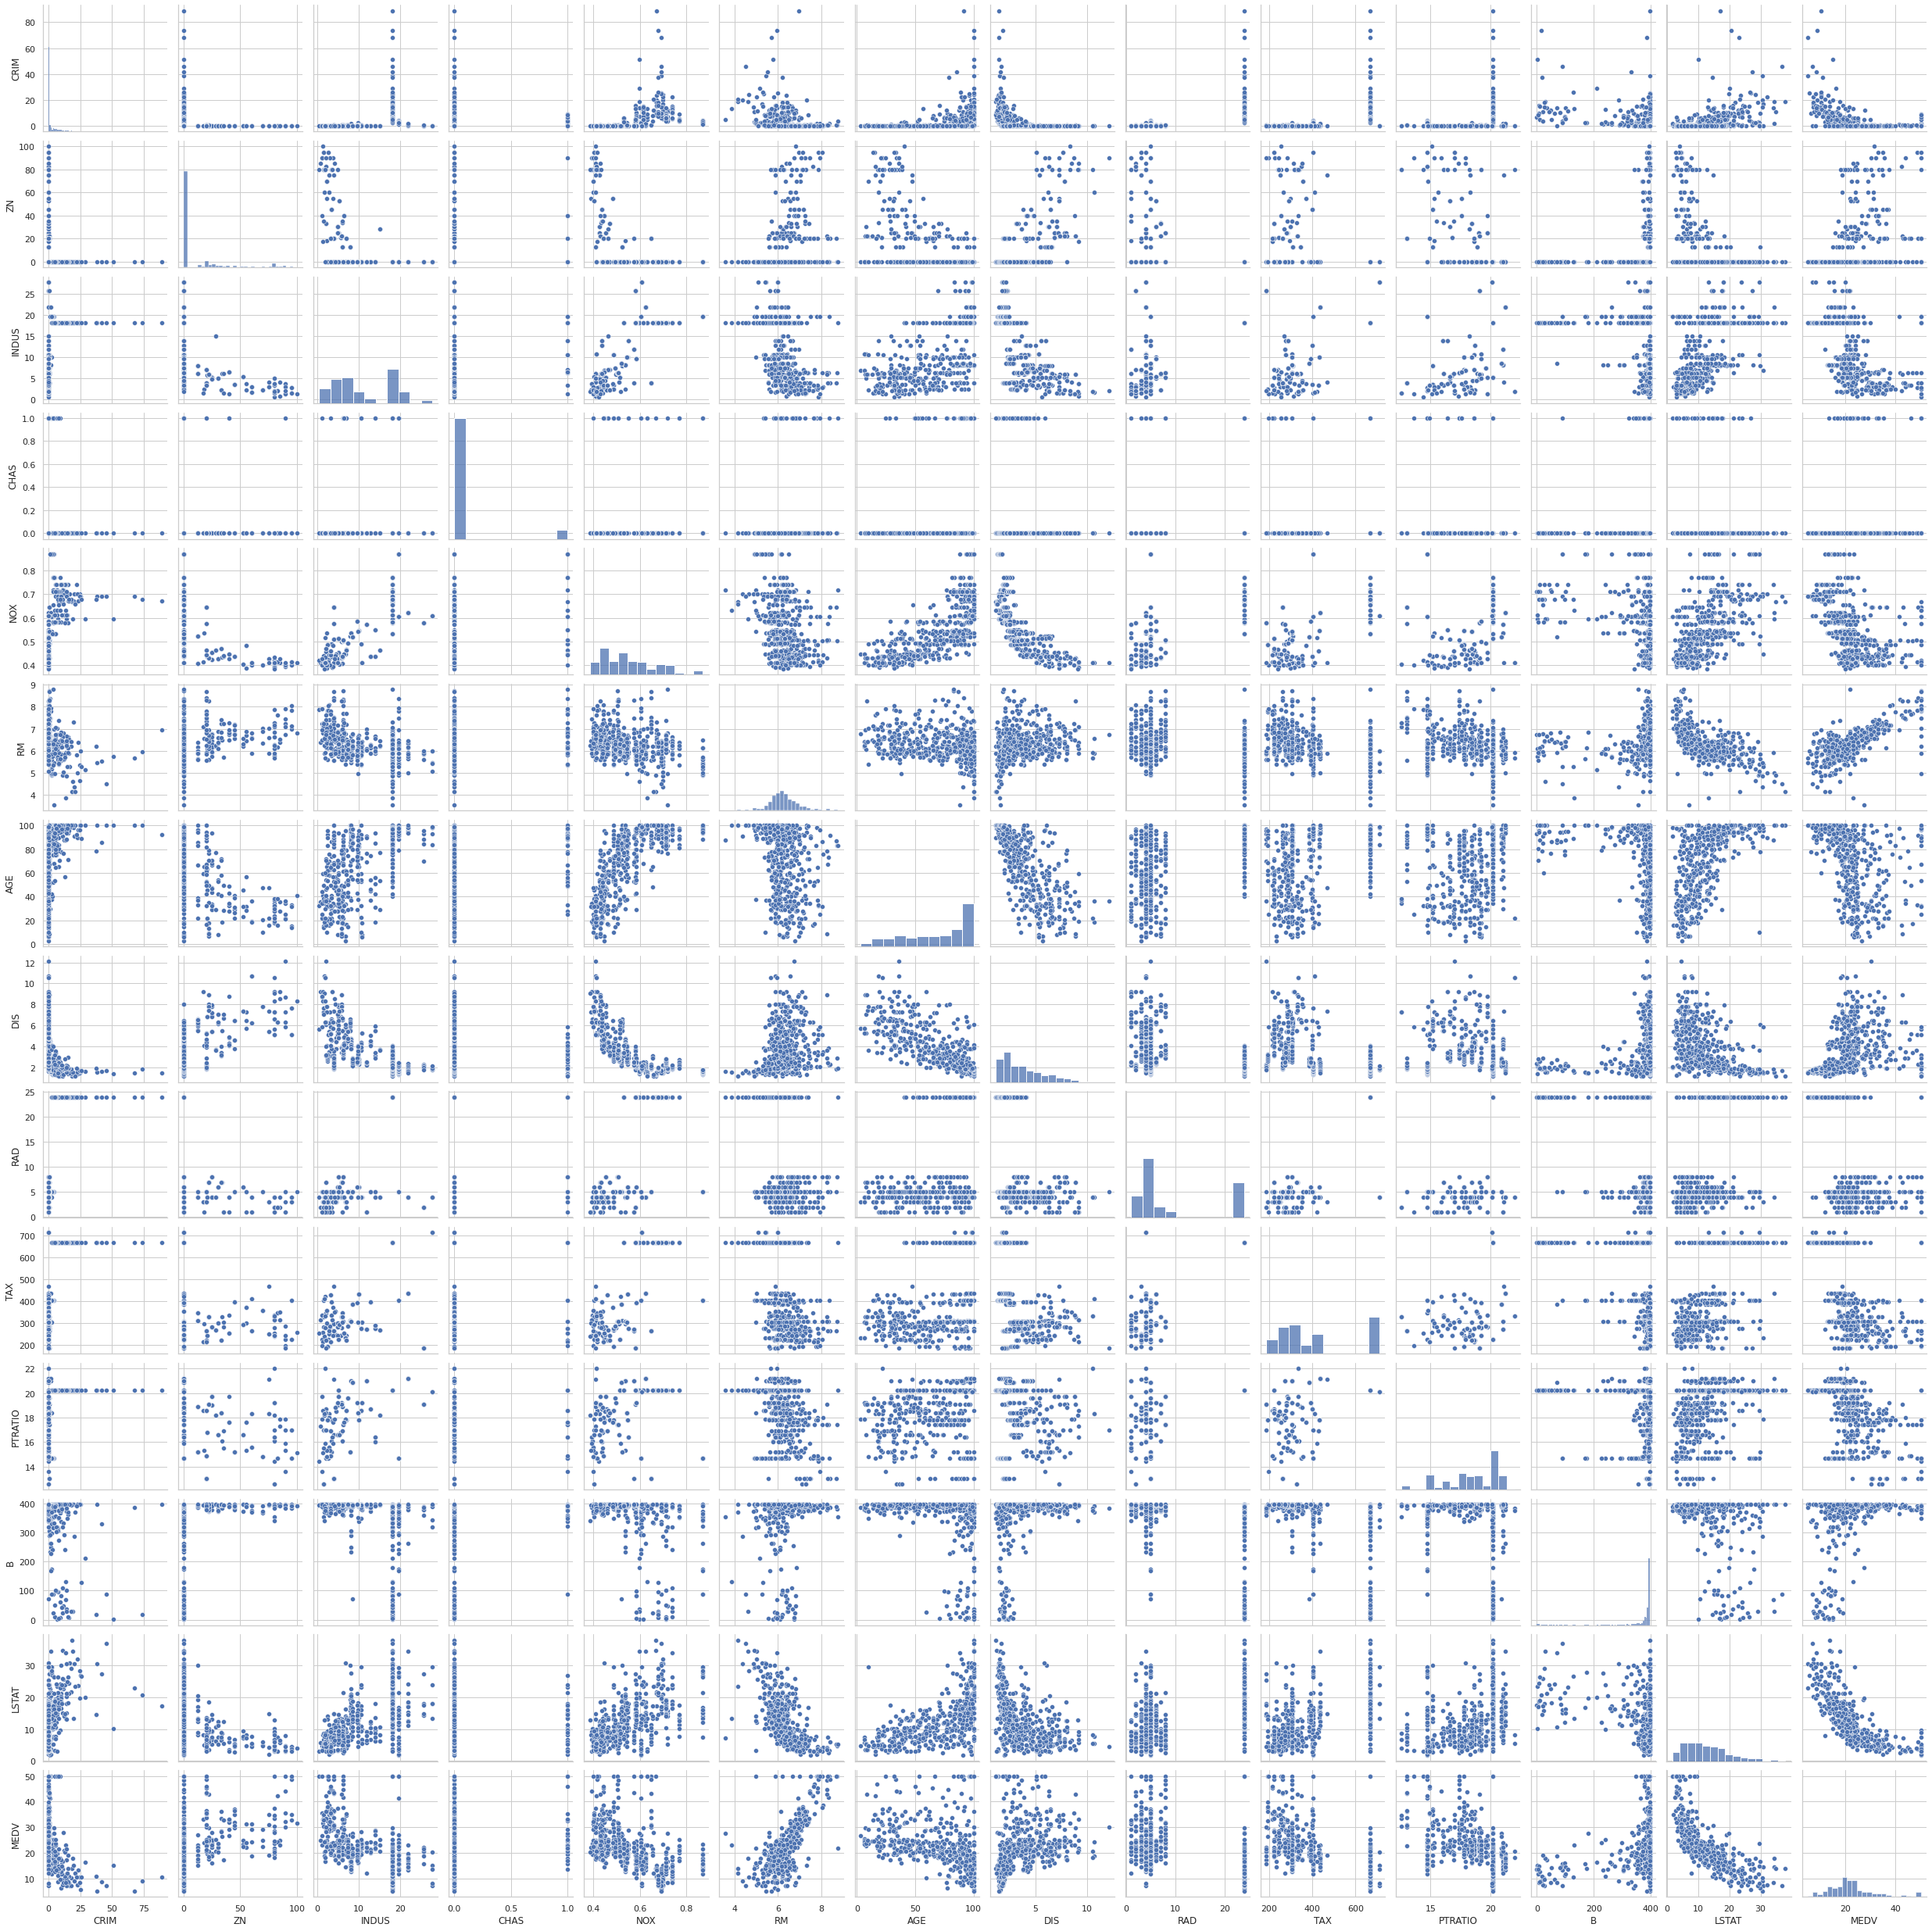

In [7]:
import matplotlib.pyplot as pltlos
from matplotlib.pyplot import figure
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = data_frame.columns

figure(figsize=(10, 3), dpi=50)
sns.pairplot(data_frame[cols], height=2.5);
plt.show()

## cambiar

- Se puede observar que algunas variables tienen una relación lineal unas con otras; por lo tanto, para obtener resultados más precisos necesitamos obtener la matriz de correlación estar seguros de que existe esa relación lineal.los

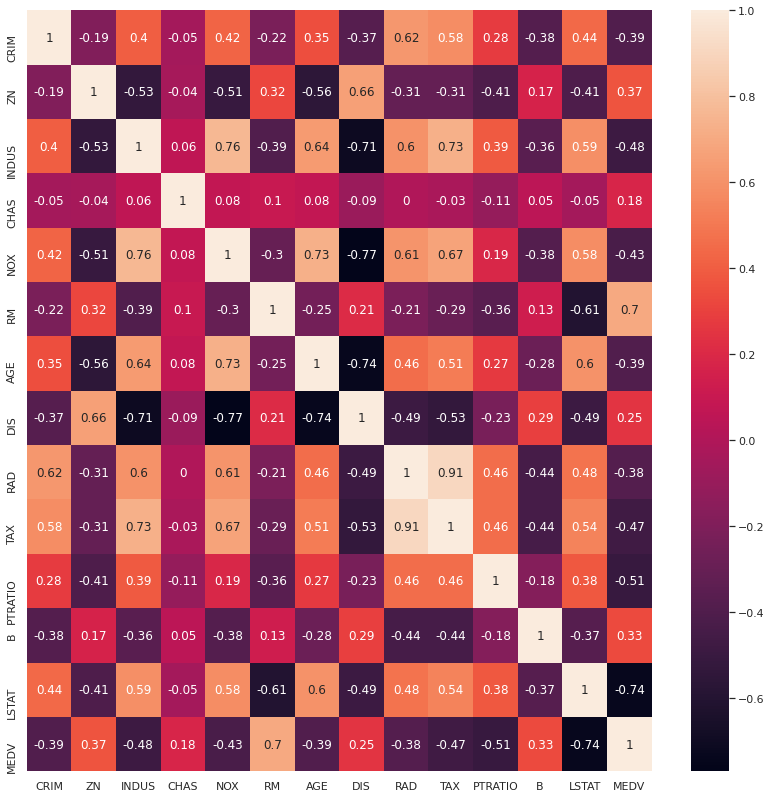

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
cols = data_frame.columns.to_numpy()
correlation_matrix = data_frame.corr().round(2)
fig, ax = plt.subplots(figsize=(14,14))
sns.set(font_scale=1)
hm = sns.heatmap(correlation_matrix, annot=True)
plt.show()

<b>5. ¿Alguno de los predictores se encuentra asociado con el crimen per capita? explique la relación.

- A partir de la matriz de correlación obtenida previamente, podemos determinar cuales indicadores poseen una alta correlación.En otras palabras, cuales de los indicadores se parecen más a los datos de crimen por cápita (CRIM). Los indicadores con mayor correlación son: 
  - RAD: índice de accesibilidad a las carreteras radiales
  - TAX: tasa de impuesto a la propiedad de valor total por cada 10,000

- A partir de los predictores mencionados podemos inferir que los suburbios que se cuentan con mayor acceso a carreteras y con mayores impuestos tienen mayor número de crimen. 

Text(0, 0.5, 'CRIM')

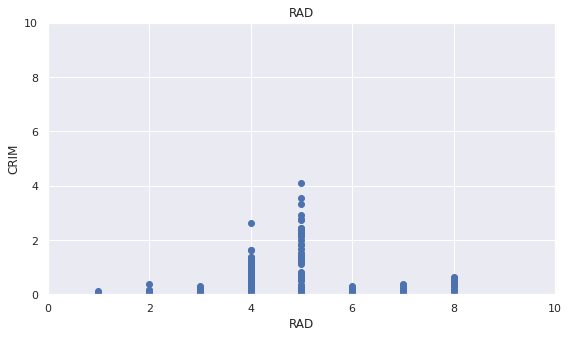

In [78]:

features = ['RAD', 'TAX']
target = data_frame['CRIM']

plt.figure(figsize=(20, 5))
plt.subplot(1, len(features) , i+1)
x = data_frame[features[0]]
y = target
plt.scatter(x, y, marker='o')
plt.title(features[0])
plt.xlabel(features[0])
plt.xlim([0,10])
plt.ylim([0,10])
plt.ylabel('CRIM')

plt.figure(figsize=(20, 5))
plt.subplot(1, len(features) , i+1)
x = data_frame[features[1]]
y = target
plt.scatter(x, y, marker='o')
plt.title(features[1])
plt.xlabel(features[1])
plt.xlim([0,500])
plt.ylim([0,5])
plt.ylabel('CRIM')

<b>6. ¿Alguno de los suburbios en Boston parece tener alto índice de crímenes?

Para determinar que suburbios tienen mayor indice de crimen, podemos gráficar la distribución de la variable objetivo CRIM:

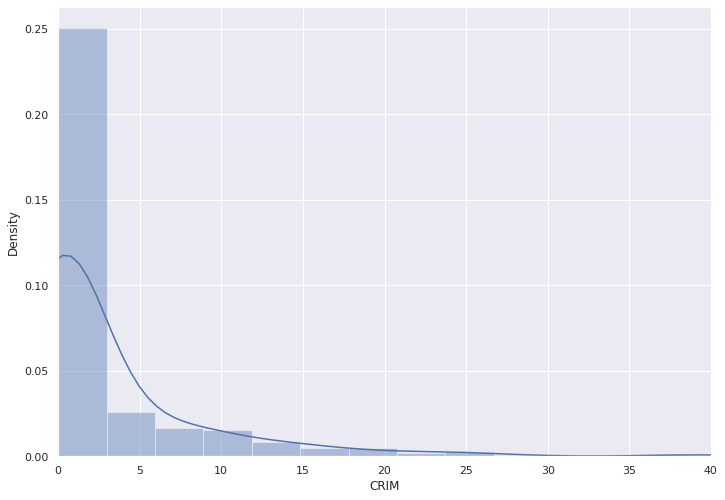

In [67]:
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_frame['CRIM'], bins=30)
plt.xlim([0,40])
plt.show()

A partir del histograma anterior podemos afirmar que los suburbios con mayor índice de crimen están dentro del rango: [0,3]

<b>7. ¿Cuántos de los suburbios se encuentran cerca del rio Charles?

In [41]:
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_frame['CHAS'], bins=30)
plt.ylim([0,30])
plt.xlim([0,0.2])
plt.show()

A partir del histograma anterior podemos determinar que 28 ciudades se encuentran cerca del Rio Charles.

<b>8. ¿Cuál es la media de la razón alumno-maestro entre los pueblos en este conjunto de datos?

In [86]:
print("media razón alumno maestro = %.2f" % data_frame['PTRATIO'].mean())

media razón alumno maestro = 18.46


<b>9. ¿Qué suburbio de Boston tiene el valor medio más bajo de viviendas ocupadas por propietarios? ¿Cuáles son los valores de los otros predictores para ese suburbio y cómo se comparan esos valores con los rangos generales de esos predictores? Comente sus hallazgos.

In [84]:
print("El suburbio con valor medio más bajo es: %d" % data_frame['MEDV'].min())

El suburbio con valor medio más bajo es: 5


<b>10. En este conjunto de datos, ¿cuántos de los suburbios promedian más de siete habitaciones por vivienda? ¿Más de ocho habitaciones por vivienda? Comente los suburbios que tienen un promedio de más de ocho habitaciones por vivienda.

In [125]:
target = data_frame['RM'] > 7
c=0

for value in target:
    if(value == True):
        c+=1
        
print("Número de suburbios con mas de siete habitaciones = %d" % c)

target = data_frame['RM'] > 8
c=0
suburbs = []
j=0
for value in target:
    if(value == True):
        suburbs.append(j)
        c+=1
    j+=1
        
print("Número de suburbios con mas de ocho habitaciones = %d" % c)

print("Suburbios con mayor de ocho viviendas:")
print(suburbs)
        
        

Número de suburbios con mas de siete habitaciones = 64
Número de suburbios con mas de ocho habitaciones = 13
Suburbios con mayor de ocho viviendas:
[97, 163, 204, 224, 225, 226, 232, 233, 253, 257, 262, 267, 364]


<b>11. Divida los datos de entrenamiento (70%) y de prueba (30%), use el modelo de regresión lineal con los datos de entrenamiento y pruébelo para predecir el valor de la casa. ¿Qué tan bien funcionó el modelo? ¿Cómo puedes mejorar estos resultados?

In [149]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.c_[data_frame['RM']], columns = ['RM'])
Y = data_frame['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

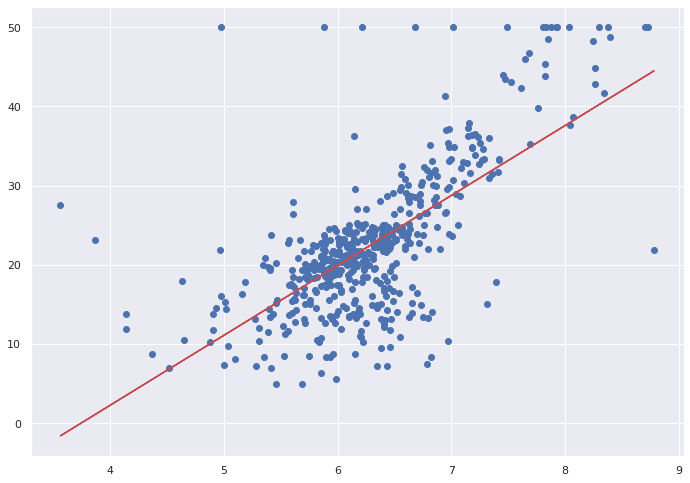

In [151]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
plt.scatter(X, Y, marker='o')

plt.plot(X_train,y_train_predict,'r')

#### **VII. Referencias**
--- 

- Raschka, S. (2015). Python Machine Learning. Packt Publishing. 

#### **VII. Librerías**
--- 

- numpy
- matplotlib
- pandas
- seaborn

#### **VIII. Repositorio del Proyecto**
--- 

<img width="30" height="30" align ="right" src="img/gitlab-282507.png">

https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Laboratorios/L1_Boston_Housing